# **Investigate Hotel Business**

### Dataset column

* `hotel` : The datasets contains the booking information of two hotel. One of the hotels is a resort hotel and the other is a city hotel
* `is_canceled` : Value indicating if the booking was canceled (1) or not (0)
* `lead_time` : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* `arrival_date_year` : Year of arrival date
* `arrival_date_month` : Month of arrival date with 12 categories: “January” to “December”
* `arrival_date_week_number` : Week number of the arrival date
* `arrival_date_day_of_month` : Day of the month of the arrival date
* `stays_in_weekend_nights` : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* `stays_in_weekdays_nights` : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel BO and BL/Calculated by counting the number of week nights
* `adults` : Number of adults
* `children` : Number of children
* `babies` : Number of babies
* `meal` : Type of meal booked. Categories are presented in standard hospitality meal packages: 
    - Undefined/SC – no meal package 
    - BB : Bed & Breakfast
    - HB : Half board (breakfast and one other meal – usually dinner)
    - FB : Full board (breakfast, lunch and dinner)
* `city` : City of origin
* `market_segment` : Market segment designation. In categories, the term
    - “TA” means “Travel Agents” and 
    - “TO” means “Tour Operators”
* `distribution_channel` : Booking distribution channel. The term 
    - “TA” means “Travel Agents” and 
    - “TO” means “Tour Operators”
* `is_repeated_guest` : Value indicating if the booking name was from a repeated guest (1) or not (0)
* `previous_cancellations` : Number of previous bookings that were cancelled by the customer prior to the current booking
* `previous_bookings_not_canceled` : Number of previous bookings not cancelled by the customer prior to the current booking
* `booking_changes` : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
* `deposit_type` : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
    - No Deposit : no deposit was made
    - Non Refund : a deposit was made in the value of the total stay cost
    -  Refundable : a deposit was made with a value under the total cost of stay
* `agent` : ID of the travel agency that made the booking
* `company` : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
* `days_in_waiting_list` : Number of days the booking was in the waiting list before it was confirmed to the customer
* `customer_type` : Type of booking, assuming one of four categories:
    - Contract - when the booking has an allotment or other type of contract associated to it
    - Group : when the booking is associated to a group
    - Transient : when the booking is not part of a group or contract, and is not associated to other transient booking
    - Transient-party : when the booking is transient, but is associated to at least other transient booking
* `adr` : Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights)
* `required_car_parking_spaces` : Number of car parking spaces required by the customer
* `total_of_special_requests` : Number of special requests made by the customer (e.g. twin bed or high floor)
* `reservation_status` : Reservation last status, assuming one of three categories: 
    - Canceled : booking was canceled by the customer
    - Check-Out : customer has checked in but already departed
    - No-Show : customer did not check-in and did inform the hotel of the reason why

Resource : https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

### **EDA**

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#show all columns
pd.pandas.set_option('display.max_columns', None)

In [4]:
# load data
df = pd.read_csv('dataset/hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

* pada dataset ini terlihat bahwa kolom `children`,`city`,`agent` dan `company` memiliki null value
* tipe data pada kolom `children`,`agent`,`company` seharusnya integer bukan float

In [6]:
# check duplicates in data
print('duplicated data:', df.duplicated().sum())

duplicated data: 33261


### **Data Preprocessing**

In [7]:
# drop duplicates
df.drop_duplicates(keep='first',inplace=True)

In [8]:
# check null values and create on dataframe
null_cols = df.columns[df.isna().any()]
df_null = df[null_cols].isna().sum().to_frame().reset_index()
df_null.columns = ['column_name', 'null_count']

# count percentage of null values
df_null['null_percentage'] = df_null['null_count'] / df_null.shape[0]*100
df_null

,column_name,null_count,null_percentage
0,children,4,100.0
1,city,450,11250.0
2,agent,11941,298525.0
3,company,81019,2025475.0


* akan dilakukan imputasi pada kolom `children`, `city`, dan `agent`
* kolom `company` akan dihapus karena memiliki null value yang sangat banyak

In [9]:
# input null values on 'children' column with value 0
df['children'] = df['children'].fillna(0)

# input null values on 'city' column with value 'Unknown'
df['city'] = df['city'].fillna('Unknown')

# input null values on 'agent' column with median
df['agent'] = df['agent'].fillna(df['agent'].median())

df.drop('company', axis=1, inplace=True)

print('null values:', df.isna().sum().sum())


null values: 0


In [10]:
# fix the data types
df['children'] = df['children'].astype('int')
df['agent'] = df['agent'].astype('int')

In [11]:
# split columns into categories and numeric
cat_colm       = df.select_dtypes(include='object').columns
num_colm       = df.select_dtypes(exclude='object').columns


In [12]:
df[cat_colm].describe().T

,count,unique,top,freq
hotel,86129,2,City Hotel,52575
arrival_date_month,86129,12,October,11150
meal,86129,5,Breakfast,67088
city,86129,178,Kota Denpasar,26903
market_segment,86129,8,Online TA,51393
distribution_channel,86129,5,TA/TO,68141
deposit_type,86129,3,No Deposit,85024
customer_type,86129,4,Personal,71648
reservation_status,86129,3,Check-Out,62393


In [13]:
df[num_colm].describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,86129.0,0.275587,0.446812,0.00,0.00,0.00,1.00,1.0
lead_time,86129.0,79.246224,85.498774,0.00,11.00,49.00,124.00,737.0
arrival_date_year,86129.0,2018.215467,0.683948,2017.00,2018.00,2018.00,2019.00,2019.0
arrival_date_week_number,86129.0,26.796433,13.675130,1.00,16.00,27.00,37.00,53.0
arrival_date_day_of_month,86129.0,15.806511,8.840436,1.00,8.00,16.00,23.00,31.0
stays_in_weekend_nights,86129.0,1.009753,1.033402,0.00,0.00,1.00,2.00,19.0
stays_in_weekdays_nights,86129.0,2.633225,2.058316,0.00,1.00,2.00,4.00,50.0
adults,86129.0,1.878554,0.627558,0.00,2.00,2.00,2.00,55.0
children,86129.0,0.140278,0.458337,0.00,0.00,0.00,0.00,10.0
babies,86129.0,0.010984,0.114421,0.00,0.00,0.00,0.00,10.0



* pada kolom `lead_time`, `agent`,`days_in_waiting_list`,`adr` memiliki jarak mean dan median yang sangat jauh atau ( distribusi skewed)
* kolom `adr` memiliki value yang bernilai negatif 

In [14]:
# check unique values
for col in cat_colm:
    print(f'unique value on column {col}: {df[col].unique()}')
    print('\n')

unique value on column hotel: ['Resort Hotel' 'City Hotel']


unique value on column arrival_date_month: ['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']


unique value on column meal: ['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']


unique value on column city: ['Kota Denpasar' 'Kabupaten Bangka' 'Kabupaten Sleman' 'Kota Batu'
 'Kota Malang' 'Kota Yogyakarta' 'Unknown' 'Kabupaten Tangerang'
 'Kota Semarang' 'Kota Serang' 'Kota Tangerang' 'Kota Bogor'
 'Kabupaten Bandung' 'Kabupaten Magelang' 'Kabupaten Sumedang'
 'Kota Jakarta Timur' 'Kabupaten Purwakarta' 'Kabupaten Kepulauan Seribu'
 'Kabupaten Belitung' 'Kota Jakarta Pusat' 'Kota Jakarta Selatan'
 'Kota Surabaya' 'Kota Jakarta Utara' 'Kota Gorontalo' 'Kota Jambi'
 'Kota Jakarta Barat' 'Kota Bengkulu' 'Kabupaten Bandung Barat'
 'Kabupaten Bekasi' 'Kabupaten Bogor' 'Kabupaten Ciamis'
 'Kabupaten Cianjur' 'Kabupaten Cirebon' 'Kota Cimahi'
 'Kabupaten Indramayu'

In [15]:
# replace Undefined values with No Meal
df['meal'].replace('Undefined', 'No Meal', inplace=True)
df['meal'].value_counts()

meal
Breakfast     67088
No Meal        9896
Dinner         8798
Full Board      347
Name: count, dtype: int64

In [16]:
# change negative values on 'adr'column to 0
df['adr'] = df['adr'].apply(lambda x: 0 if x < 0 else x) 

In [17]:
print(f'data sebelum preprocessing:',df.shape[0],'\n')

# create new column and removing unnecessary data
df['guest'] = df['adults'] + df['children'] + df['babies']
print('Data dengan 0 guest : {0} out of {1} all data'.format(df[df['guest']==0].shape[0],df.shape[0]))
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
print('Data dengan 0 night : {0} out of {1} all data'.format(df[df['stay_duration']==0].shape[0],df.shape[0]))
print('\n')

#remove unnecessary data
df_new = df[(df['guest'] > 0) & (df['stay_duration'] > 0)]

print('data setelah preprocessing:',df_new.shape[0])

data sebelum preprocessing: 86129 

Data dengan 0 guest : 165 out of 86129 all data
Data dengan 0 night : 645 out of 86129 all data


data setelah preprocessing: 85378


In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85378 entries, 2 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85378 non-null  object 
 1   is_canceled                     85378 non-null  int64  
 2   lead_time                       85378 non-null  int64  
 3   arrival_date_year               85378 non-null  int64  
 4   arrival_date_month              85378 non-null  object 
 5   arrival_date_week_number        85378 non-null  int64  
 6   arrival_date_day_of_month       85378 non-null  int64  
 7   stays_in_weekend_nights         85378 non-null  int64  
 8   stays_in_weekdays_nights        85378 non-null  int64  
 9   adults                          85378 non-null  int64  
 10  children                        85378 non-null  int64  
 11  babies                          85378 non-null  int64  
 12  meal                            8537

In [19]:
df_new.to_csv('dataset/hotel_bookings_clean.csv', index=False)

### **Monthly Hotel Booking Analysis Based on Hotel Type**

In [20]:
# aggreate on columns 'hotel' and 'arrival_date_month' with count of column 'arrival_date_year'
df2 = df_new.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
df2.columns = ['hotel', 'arrival_month', 'unique_year', 'total_booking']
df2.sample(9)

,hotel,arrival_month,unique_year,total_booking
7,City Hotel,March,2,2674
2,City Hotel,December,2,4009
19,Resort Hotel,March,2,1904
11,City Hotel,September,3,5657
5,City Hotel,July,2,5321
10,City Hotel,October,3,6473
14,Resort Hotel,December,2,2618
12,Resort Hotel,April,2,2453
9,City Hotel,November,2,4040


Pada data diatas dapat kita ketahui bahwa pada bulan September dan Oktober data di ambil dari data selama 3 tahun, sedangkan bulan lain hanya diambil dari data selama 2 tahun, sehingga perlu dilakukan normalisasi agar perbandingannya sesuai.

In [21]:
# normalize total booking by month in different year
df2['average_total_booking'] = round(df2['total_booking'] / df2['unique_year'])
df2.sample(9)

,hotel,arrival_month,unique_year,total_booking,average_total_booking
4,City Hotel,January,2,2849,1424.0
2,City Hotel,December,2,4009,2004.0
13,Resort Hotel,August,2,2705,1352.0
5,City Hotel,July,2,5321,2660.0
23,Resort Hotel,September,3,4263,1421.0
19,Resort Hotel,March,2,1904,952.0
6,City Hotel,June,2,5017,2508.0
21,Resort Hotel,November,2,2386,1193.0
16,Resort Hotel,January,2,1995,998.0


In [22]:
# ordered month
ordered_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2['month'] = pd.Categorical(df2['arrival_month'], categories=ordered_month, ordered=True)
df2.sample(9)

,hotel,arrival_month,unique_year,total_booking,average_total_booking,month
8,City Hotel,May,2,4777,2388.0,May
12,Resort Hotel,April,2,2453,1226.0,April
13,Resort Hotel,August,2,2705,1352.0,August
22,Resort Hotel,October,3,4615,1538.0,October
5,City Hotel,July,2,5321,2660.0,July
0,City Hotel,April,2,3514,1757.0,April
3,City Hotel,February,2,2952,1476.0,February
7,City Hotel,March,2,2674,1337.0,March
9,City Hotel,November,2,4040,2020.0,November


Text(10.7, 4650, 'Musim\nLiburan')

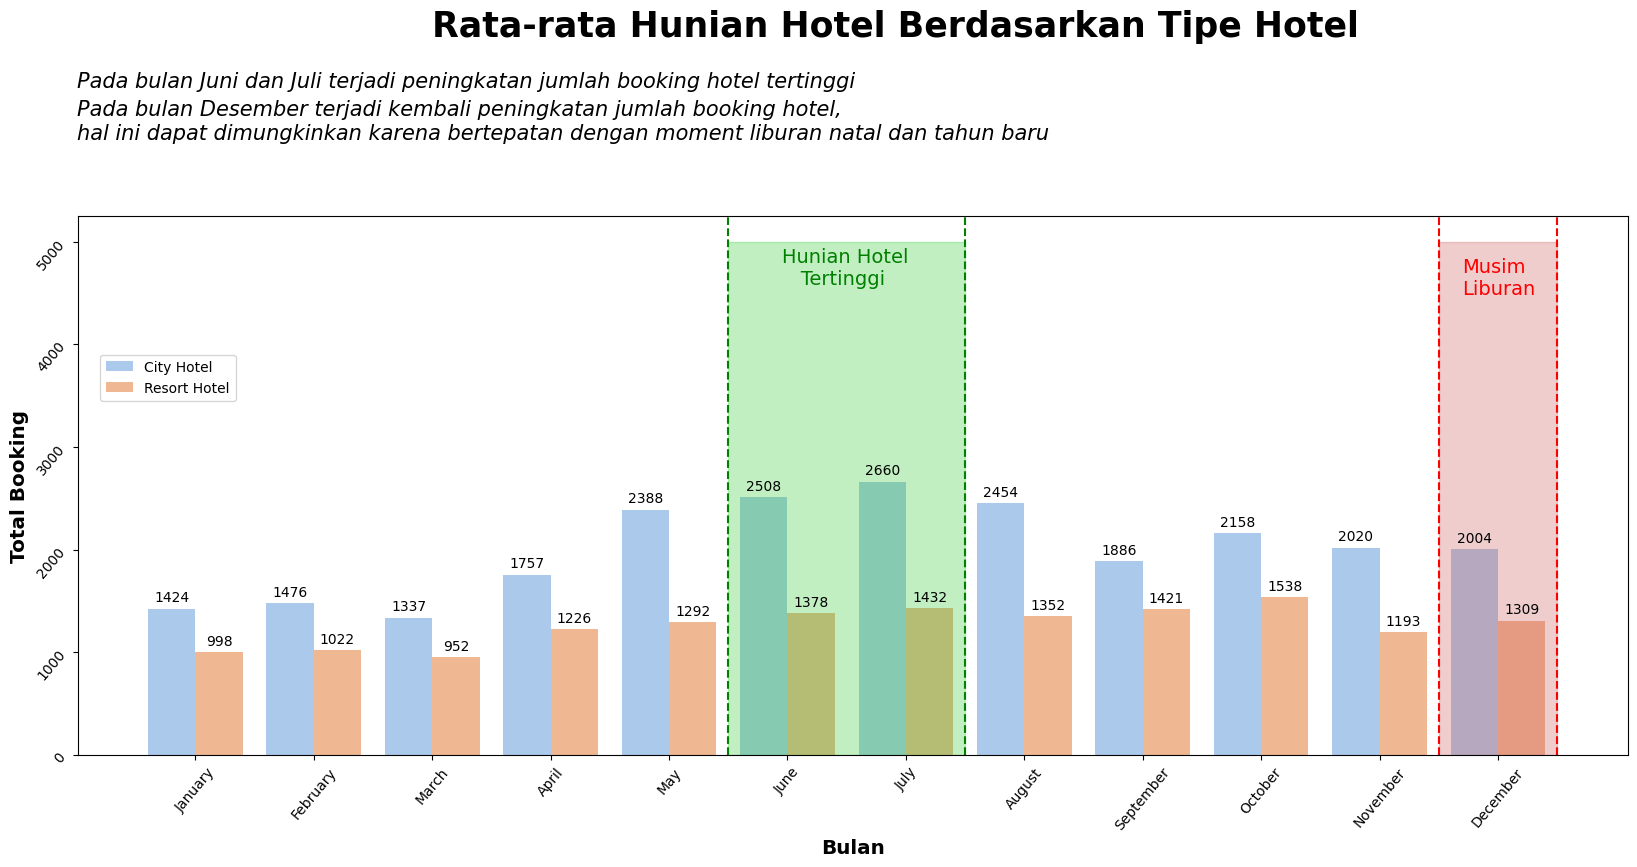

In [23]:
fig,ax = plt.subplots(figsize=(20,7))
sns.barplot(x='month', y='average_total_booking', data=df2,hue='hotel',ax=ax,palette='pastel')
# change legend position
ax.legend(loc='center left', bbox_to_anchor=(0.01,0.7))

# give annotate
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
    
#rotate x label
plt.tick_params(axis='both',which='major', rotation=50,labelsize=10)
plt.text(x=2, y=7000, s='Rata-rata Hunian Hotel Berdasarkan Tipe Hotel', fontsize=25,fontweight='bold')
plt.text(x=-1, y=6500, s='Pada bulan Juni dan Juli terjadi peningkatan jumlah booking hotel tertinggi', fontsize=15, fontstyle='italic')
plt.text(x=-1, y=6000, s='Pada bulan Desember terjadi kembali peningkatan jumlah booking hotel,\nhal ini dapat dimungkinkan karena bertepatan dengan moment liburan natal dan tahun baru ', fontsize=15, fontstyle='italic')


plt.xlabel('Bulan', fontsize='x-large',fontweight='bold')
plt.ylabel('Total Booking', fontsize='x-large',fontweight='bold')

#create axvline
plt.axvline(4.5, ls='--', color='green')
plt.axvline(6.5, ls='--', color='green')
plt.stackplot(np.arange(4.5,7.5), [[5000]], color='limegreen', alpha=0.3)
plt.text(x=4.95, y=4750, s='Hunian Hotel\n   Tertinggi', fontsize=14, color='green', va='center')


plt.axvline(10.5, ls='--', color='red')
plt.axvline(11.5, ls='--', color='red')
plt.stackplot(np.arange(10.5,12.5), [[5000]], color='indianred', alpha=0.3)
plt.text(x=10.7, y=4650, s='Musim\nLiburan', fontsize=14, color='red', va='center')



### **Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates**

In [24]:
df_new['stay_duration'].value_counts()

stay_duration
3     17527
1     16908
2     15332
4     13382
7      7464
5      6698
6      3249
10     1071
8      1059
14      857
9       778
11      366
12      196
13      132
15       69
21       55
28       34
16       33
19       22
18       22
17       20
25       14
29       13
20       13
22       12
30       11
26        6
24        6
23        5
35        5
27        4
42        4
56        2
33        2
60        1
69        1
46        1
45        1
38        1
48        1
34        1
Name: count, dtype: int64

<Axes: xlabel='stay_duration', ylabel='guest'>

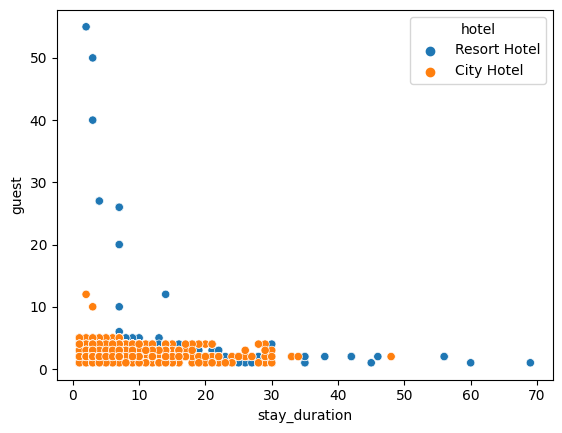

In [25]:
# show stay duration distribution using scatter plot
sns.scatterplot(x='stay_duration', y='guest', data=df_new, hue='hotel')


In [26]:
# create grouping of stay duration
duration = []
for i in df_new['stay_duration']:
    if i >=1 and i <=7:
        group = '1 week'
    elif i >=8 and i <=14:
        group = '2 weeks'
    elif i >=15 and i <=21:
        group = '3 weeks'
    else :
        group = '4 weeks'
    duration.append(group)

df_new['group_stay_duration'] = duration
    

/var/folders/x8/g53p23zs4xb2b1w8ybz3nzjw0000gn/T/ipykernel_1789/2926177484.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['group_stay_duration'] = duration


In [27]:
df_new.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,stay_duration,group_stay_duration
50472,City Hotel,1,93,2018,July,19,2,1,0,2,0,0,No Meal,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,Personal,116.1,0,0,Canceled,2,1,1 week
63891,City Hotel,1,29,2019,April,8,24,2,2,3,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,Personal,134.3,0,0,Canceled,3,4,1 week
37205,Resort Hotel,0,41,2019,August,22,3,2,5,2,0,0,Dinner,Kota Malang,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,Family,172.0,0,1,Check-Out,2,7,1 week


In [28]:
# lets agregate hotel,is_cancelled,stay_duration on arrival_date_month
df3 = df_new.groupby(['hotel','is_canceled','group_stay_duration' ]).agg({'arrival_date_month':'count'}).reset_index()
df3.sample(9)

,hotel,is_canceled,group_stay_duration,arrival_date_month
8,Resort Hotel,0,1 week,22665
10,Resort Hotel,0,3 weeks,87
3,City Hotel,0,4 weeks,6
14,Resort Hotel,1,3 weeks,47
13,Resort Hotel,1,2 weeks,939
5,City Hotel,1,2 weeks,523
1,City Hotel,0,2 weeks,486
11,Resort Hotel,0,4 weeks,54
9,Resort Hotel,0,2 weeks,2511


In [29]:
# create new table with hotel, stay_duration, is_canceled 0 and is_canceled 1 using pivot table
df3_split = df3.pivot_table(index=['hotel', 'group_stay_duration'],
                                  columns=['is_canceled'],
                                  values=['arrival_date_month']).reset_index()
df3_split.columns = ['hotel', 'group_stay_duration', 'no_cancelled', 'cancelled']
df3_split.sample(5)


,hotel,group_stay_duration,no_cancelled,cancelled
5,Resort Hotel,2 weeks,2511,939
6,Resort Hotel,3 weeks,87,47
2,City Hotel,3 weeks,27,73
0,City Hotel,1 week,35845,15192
1,City Hotel,2 weeks,486,523


In [30]:
# cancelled percentage
df3_split['cancelled_rate (%)'] = round(df3_split['cancelled'] / (df3_split['no_cancelled']+ df3_split['cancelled'])*100,2)

In [31]:
df3_split.sample(5)

,hotel,group_stay_duration,no_cancelled,cancelled,cancelled_rate (%)
1,City Hotel,2 weeks,486,523,51.83
7,Resort Hotel,4 weeks,54,26,32.50
5,Resort Hotel,2 weeks,2511,939,27.22
2,City Hotel,3 weeks,27,73,73.00
6,Resort Hotel,3 weeks,87,47,35.07


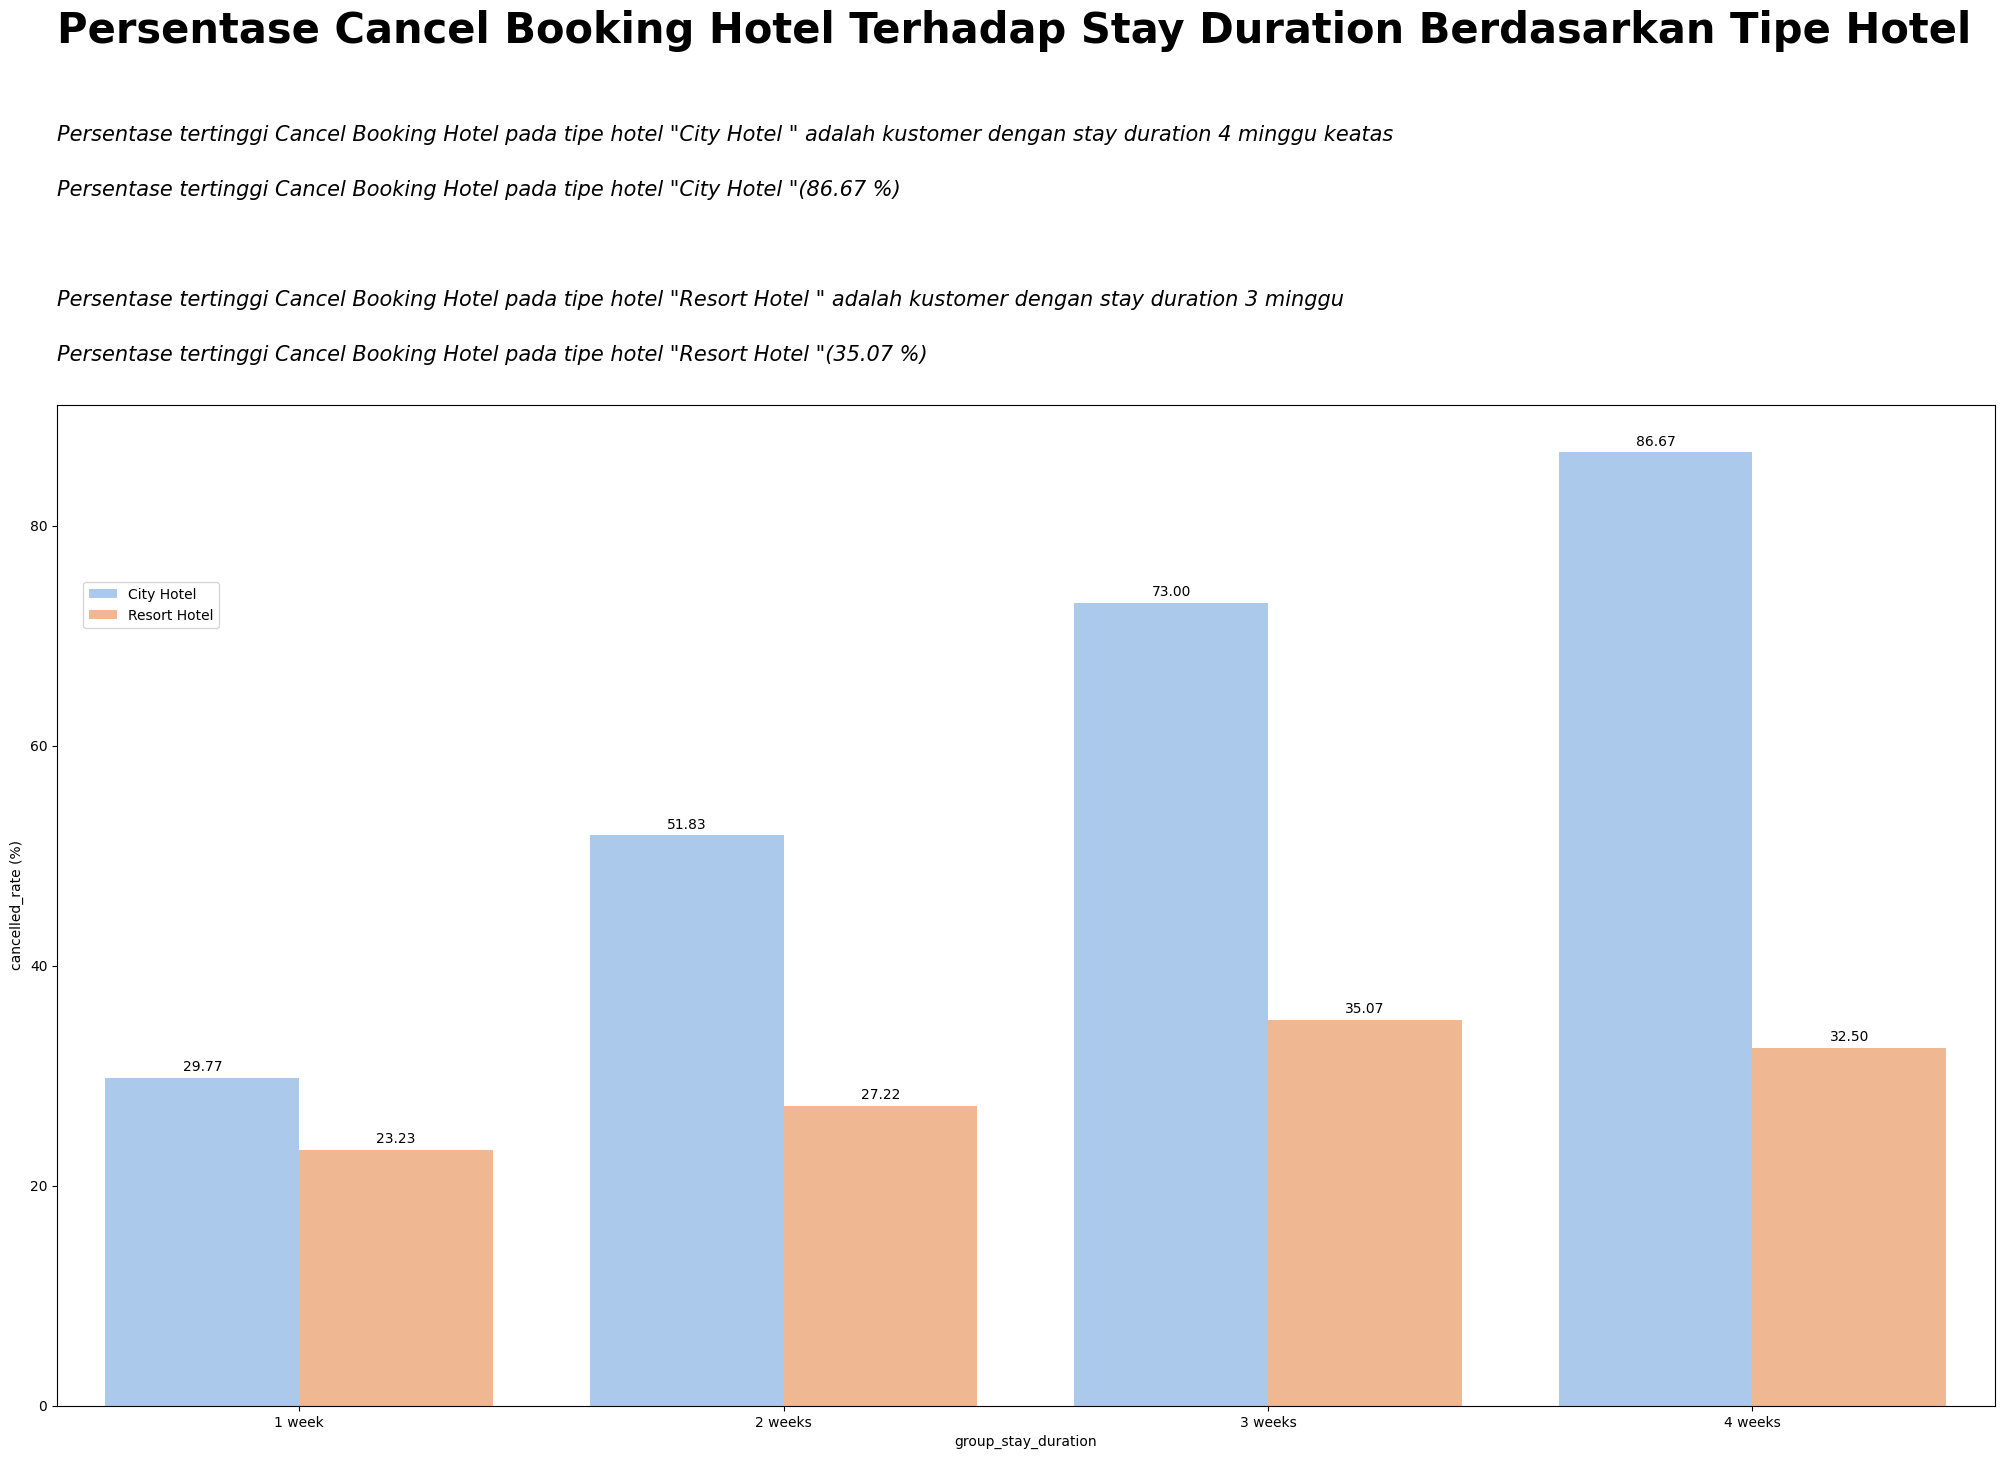

In [246]:
# lets create visualization using barplot
fig,ax= plt.subplots(figsize=(25,13))
sns.barplot(x='group_stay_duration', y='cancelled_rate (%)', data=df3_split,hue='hotel',ax=ax,palette='pastel')
plt.text(x=-0.5, y=125, s='Persentase Cancel Booking Hotel Terhadap Stay Duration Berdasarkan Tipe Hotel', fontsize=30,fontweight='bold',va = 'center')
plt.text(x=-0.5, y=115, s='Persentase tertinggi Cancel Booking Hotel pada tipe hotel "City Hotel " adalah kustomer dengan stay duration 4 minggu keatas ', fontsize=15, fontstyle='italic')
plt.text(x=-0.5, y=110, s='Persentase tertinggi Cancel Booking Hotel pada tipe hotel "City Hotel "(86.67 %) ', fontsize=15, fontstyle='italic')
plt.text(x=-0.5, y=100, s='Persentase tertinggi Cancel Booking Hotel pada tipe hotel "Resort Hotel " adalah kustomer dengan stay duration 3 minggu ', fontsize=15, fontstyle='italic')
plt.text(x=-0.5, y=95, s='Persentase tertinggi Cancel Booking Hotel pada tipe hotel "Resort Hotel "(35.07 %) ', fontsize=15, fontstyle='italic')

ax.legend(loc='center left', bbox_to_anchor=(0.01,0.8))


#give annotate 
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')



### **Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate**
Menganalisis bagaimana korelasi antara jarak waktu pemesanan hotel terhadap tingkat pembatalan pemesanan hotel

In [33]:
df4 = df_new.copy()

In [46]:
# lets grouping lead_time on 30 days
lead = []
for i in df4['lead_time']:
    if i >=1 and i <=30:
        group = 'a Month'
    elif i >=31 and i <=180:
        group = '2 - half year'
    elif i >=181 and i <=365:
        group = '7 Months - a year'
    else :
        group = 'more than a year'
    lead.append(group)

df4['group_lead_time'] = lead


In [47]:
df4['group_lead_time'].value_counts()

group_lead_time
2 - half year        40204
a Month              28177
7 Months - a year    10840
more than a year      6157
Name: count, dtype: int64

In [61]:

ordered_lead_time  =    ['a Month', '2 - half year', '7 Months - a year', 'more than a year']
df4['group_lead_time'] = pd.Categorical(df4['group_lead_time'], categories=ordered_lead_time, ordered=True)
df4.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,stay_duration,group_stay_duration,group_lead_time
87808,City Hotel,0,65,2018,June,18,24,2,0,2,0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,Family,118.8,0,1,Check-Out,2,2,1 week,2 - half year


In [62]:
df4['customer_type'].value_counts()

customer_type
Personal     71032
Family       10707
Contract      3105
Bussiness      534
Name: count, dtype: int64

In [63]:
df4_group = df4.groupby(['hotel','group_lead_time','is_canceled']).agg({'customer_type':'count'}).reset_index()
df4_group.rename(columns={'customer_type':'customer_booking'},inplace=True)
df4_group.sample(5)

,hotel,group_lead_time,is_canceled,customer_booking
10,Resort Hotel,2 - half year,0,9666
7,City Hotel,more than a year,1,394
15,Resort Hotel,more than a year,1,166
1,City Hotel,a Month,1,3720
0,City Hotel,a Month,0,13543


In [64]:
# lets pivot hotel and group_lead_time on is_canceled
df4_group_split = df4_group.pivot_table(index=['hotel','group_lead_time'],
                                  columns=['is_canceled'],
                                  values=['customer_booking']).reset_index()
df4_group_split.columns = ['hotel', 'group_lead_time', 'no_cancelled', 'cancelled']
df4_group_split.sample(5)


,hotel,group_lead_time,no_cancelled,cancelled
5,Resort Hotel,2 - half year,9666,4343
1,City Hotel,2 - half year,17057,9138
6,Resort Hotel,7 Months - a year,3349,1800
0,City Hotel,a Month,13543,3720
3,City Hotel,more than a year,2648,394


In [65]:
# create percentage of cancel booking on group_lead_time
df4_group_split['cancelled_rate (%)'] = round(df4_group_split['cancelled'] / (df4_group_split['no_cancelled']+ df4_group_split['cancelled'])*100,2)
df4_group_split.sample(5)

,hotel,group_lead_time,no_cancelled,cancelled,cancelled_rate (%)
2,City Hotel,7 Months - a year,3116,2575,45.25
4,Resort Hotel,a Month,9353,1561,14.30
1,City Hotel,2 - half year,17057,9138,34.88
6,Resort Hotel,7 Months - a year,3349,1800,34.96
5,Resort Hotel,2 - half year,9666,4343,31.00


Text(0, 0.5, 'Persentase Cancel Booking')

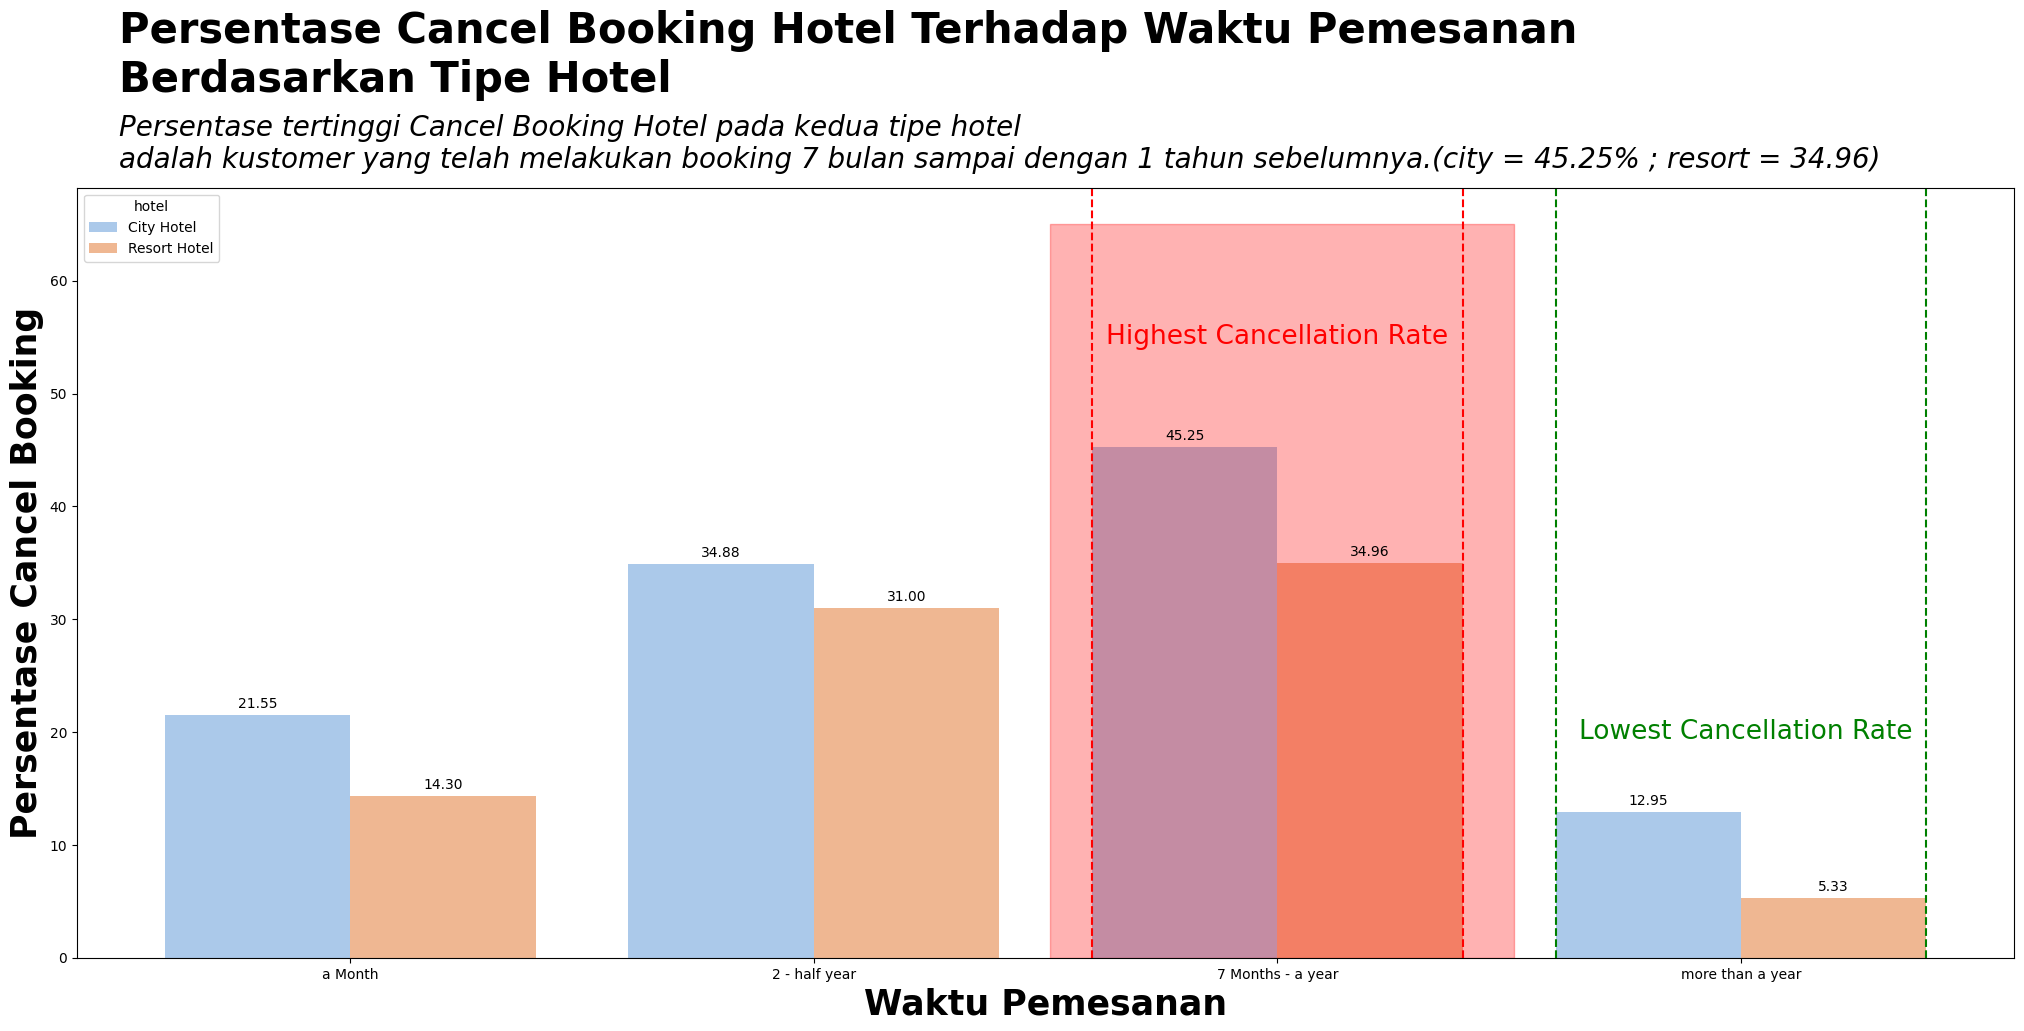

In [247]:
# create visualization using barplot
fig,ax= plt.subplots(figsize=(25,10))
sns.barplot(x='group_lead_time', y='cancelled_rate (%)', data=df4_group_split,hue='hotel',ax=ax,palette='pastel')

#give annotate
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')

#create axvline
plt.axvline(2.6, ls='--', color='green')
plt.axvline(3.4, ls='--', color='green')
plt.text(x=2.65, y=20, s='Lowest Cancellation Rate', fontsize=19,color='green', va='center')

plt.axvline(1.6, ls='--', color='red')
plt.axvline(2.4, ls='--', color='red')
plt.text(x=1.63, y=55, s='Highest Cancellation Rate', fontsize=19,color='red', va='center')
plt.stackplot(np.arange(1.51,2.61), [[65]], color='red', alpha=0.3)


plt.text(x=-0.5, y=80, s='Persentase Cancel Booking Hotel Terhadap Waktu Pemesanan\nBerdasarkan Tipe Hotel', fontsize=30,fontweight='bold',va = 'center')
plt.text(x=-0.5, y=70, s='Persentase tertinggi Cancel Booking Hotel pada kedua tipe hotel\nadalah kustomer yang telah melakukan booking 7 bulan sampai dengan 1 tahun sebelumnya.(city = 45.25% ; resort = 34.96)', fontsize=20, fontstyle='italic')
plt.xlabel('Waktu Pemesanan', fontsize=25,fontweight='bold')
plt.ylabel('Persentase Cancel Booking', fontsize=25,fontweight='bold')
